<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right"> Massimo Nocentini<br>
<small>
<br>September {23, 26}, 2016: refactoring toward class-based code
<br>September 22, 2016: Quicksort theory, average cases
</small>
</div>
</p>
<br>

<p>
<div align="center">
<b>Abstract</b><br>
In this notebook we study two recurrence relations arising from the analysis of the `Quicksort` algorithm: numbers of checks and swaps are taken into account, in the average case. Such relations involve subterms where subscripts dependends on *one* dimension. They are a simple, but interesting, starting point to approach the general method of <b>recurrence unfolding</b>, an algorithmic/symbolical idea stretched further in other notebooks.
</div>
</p>

In [1]:
%run "recurrences.py"
%run "sums.py"
%run "start_session.py"

In [5]:
from itertools import accumulate

def accumulating(acc, current): return Eq(acc.lhs + current.lhs, acc.rhs + current.rhs)

### A generalization using accumulation

In [51]:
mapped = list(accumulate(mapped, accumulating))
mapped

[f[n + 2] = f[n + 2], 2⋅f[n + 2] = f[n] + f[n + 1] + f[n + 2], 3⋅f[n + 2] = 2⋅
f[n] + f[n - 2] + 2⋅f[n - 1] + f[n + 1] + f[n + 2], 4⋅f[n + 2] = 2⋅f[n] + f[n 
- 4] + 3⋅f[n - 3] + 4⋅f[n - 2] + 3⋅f[n - 1] + f[n + 1] + f[n + 2], 5⋅f[n + 2] 
= 2⋅f[n] + f[n - 6] + 4⋅f[n - 5] + 7⋅f[n - 4] + 7⋅f[n - 3] + 5⋅f[n - 2] + 3⋅f[
n - 1] + f[n + 1] + f[n + 2], 6⋅f[n + 2] = 2⋅f[n] + f[n - 8] + 5⋅f[n - 7] + 11
⋅f[n - 6] + 14⋅f[n - 5] + 12⋅f[n - 4] + 8⋅f[n - 3] + 5⋅f[n - 2] + 3⋅f[n - 1] +
 f[n + 1] + f[n + 2], 7⋅f[n + 2] = 2⋅f[n] + f[n - 10] + 6⋅f[n - 9] + 16⋅f[n - 
8] + 25⋅f[n - 7] + 26⋅f[n - 6] + 20⋅f[n - 5] + 13⋅f[n - 4] + 8⋅f[n - 3] + 5⋅f[
n - 2] + 3⋅f[n - 1] + f[n + 1] + f[n + 2], 8⋅f[n + 2] = 2⋅f[n] + f[n - 12] + 7
⋅f[n - 11] + 22⋅f[n - 10] + 41⋅f[n - 9] + 51⋅f[n - 8] + 46⋅f[n - 7] + 33⋅f[n -
 6] + 21⋅f[n - 5] + 13⋅f[n - 4] + 8⋅f[n - 3] + 5⋅f[n - 2] + 3⋅f[n - 1] + f[n +
 1] + f[n + 2], 9⋅f[n + 2] = 2⋅f[n] + f[n - 14] + 8⋅f[n - 13] + 29⋅f[n - 12] +
 63⋅f[n - 11] + 92⋅f[n - 10] + 97⋅f[n - 9] + 79⋅f[n 

In [52]:
clear_cache()
m,v,r = to_matrix_notation(mapped, f, [n-k for k in range(-2, 19)])
m,v,r

⎛⎡1  0  0  0  0  0  0   0   0   0   0    0    0    0    0    0    0    0   0  
⎜⎢                                                                            
⎜⎢1  1  1  0  0  0  0   0   0   0   0    0    0    0    0    0    0    0   0  
⎜⎢                                                                            
⎜⎢1  1  2  2  1  0  0   0   0   0   0    0    0    0    0    0    0    0   0  
⎜⎢                                                                            
⎜⎢1  1  2  3  4  3  1   0   0   0   0    0    0    0    0    0    0    0   0  
⎜⎢                                                                            
⎜⎢1  1  2  3  5  7  7   4   1   0   0    0    0    0    0    0    0    0   0  
⎜⎢                                                                            
⎜⎢1  1  2  3  5  8  12  14  11  5   1    0    0    0    0    0    0    0   0  
⎜⎢                                                                            
⎜⎢1  1  2  3  5  8  13  20  26  25  16   6    1    0

In [53]:
m_sym = m.subs(inverted_fibs, simultaneous=True)
m_sym[:,0] = m_sym[:,0].subs(f[2],f[1])
m_sym[1,2] = m_sym[1,2].subs(f[2],f[1])
m_sym

⎡f[1]   0     0     0     0     0     0     0     0      0      0     0    0  
⎢                                                                             
⎢f[1]  f[2]  f[1]   0     0     0     0     0     0      0      0     0    0  
⎢                                                                             
⎢f[1]  f[2]  f[3]  f[3]  f[2]   0     0     0     0      0      0     0    0  
⎢                                                                             
⎢f[1]  f[2]  f[3]  f[4]   4    f[4]  f[2]   0     0      0      0     0    0  
⎢                                                                             
⎢f[1]  f[2]  f[3]  f[4]  f[5]   7     7     4    f[2]    0      0     0    0  
⎢                                                                             
⎢f[1]  f[2]  f[3]  f[4]  f[5]  f[6]   12    14    11   f[5]   f[2]    0    0  
⎢                                                                             
⎢f[1]  f[2]  f[3]  f[4]  f[5]  f[6]  f[7]   20    26

In [34]:
# the following cell produces an error due to ordering, while `m * v` doesn't.
#clear_cache()
#m_sym * v

In [35]:
to_matrix_notation(mapped, f, [n+k for k in range(-18, 3)])

⎛⎡0  0   0    0    0    0    0    0    0    0   0   0   0   0   0   0  0  0  0
⎜⎢                                                                            
⎜⎢0  0   0    0    0    0    0    0    0    0   0   0   0   0   0   0  0  0  1
⎜⎢                                                                            
⎜⎢0  0   0    0    0    0    0    0    0    0   0   0   0   0   0   0  1  2  2
⎜⎢                                                                            
⎜⎢0  0   0    0    0    0    0    0    0    0   0   0   0   0   1   3  4  3  2
⎜⎢                                                                            
⎜⎢0  0   0    0    0    0    0    0    0    0   0   0   1   4   7   7  5  3  2
⎜⎢                                                                            
⎜⎢0  0   0    0    0    0    0    0    0    0   1   5   11  14  12  8  5  3  2
⎜⎢                                                                            
⎜⎢0  0   0    0    0    0    0    0    1    6   16  

According to [A162741][oeis], we can generalize the pattern above:

[oeis]:http://oeis.org/A162741

In [75]:
i = symbols('i')
d = IndexedBase('d')
k_fn_gen = Eq((k+1)*f[n], Sum(d[k,2*k-i]*f[n-i], (i, 0, 2*k)))
d_triangle= {d[0,0]:1, d[n,2*n]:1, d[n,k]:d[n-1, k-1]+d[n-1,k]}
k_fn_gen, d_triangle

⎛                2⋅k                                                          
⎜                ___                                                          
⎜                ╲                                                            
⎜                 ╲   f[-i + n]⋅d[k, -i + 2*k]                                
⎜(k + 1)⋅f[n] =   ╱                           , {d[0, 0]: 1, d[n, k]: d[n - 1,
⎜                ╱                                                            
⎜                ‾‾‾                                                          
⎝               i = 0                                                         

                                    ⎞
                                    ⎟
                                    ⎟
                                    ⎟
 k] + d[n - 1, k - 1], d[n, 2*n]: 1}⎟
                                    ⎟
                                    ⎟
                                    ⎠

In [54]:
mapped = list(accumulate(mapped, accumulating))
mapped

[f[n + 2] = f[n + 2], 3⋅f[n + 2] = f[n] + f[n + 1] + 2⋅f[n + 2], 6⋅f[n + 2] = 
3⋅f[n] + f[n - 2] + 2⋅f[n - 1] + 2⋅f[n + 1] + 3⋅f[n + 2], 10⋅f[n + 2] = 5⋅f[n]
 + f[n - 4] + 3⋅f[n - 3] + 5⋅f[n - 2] + 5⋅f[n - 1] + 3⋅f[n + 1] + 4⋅f[n + 2], 
15⋅f[n + 2] = 7⋅f[n] + f[n - 6] + 4⋅f[n - 5] + 8⋅f[n - 4] + 10⋅f[n - 3] + 10⋅f
[n - 2] + 8⋅f[n - 1] + 4⋅f[n + 1] + 5⋅f[n + 2], 21⋅f[n + 2] = 9⋅f[n] + f[n - 8
] + 5⋅f[n - 7] + 12⋅f[n - 6] + 18⋅f[n - 5] + 20⋅f[n - 4] + 18⋅f[n - 3] + 15⋅f[
n - 2] + 11⋅f[n - 1] + 5⋅f[n + 1] + 6⋅f[n + 2], 28⋅f[n + 2] = 11⋅f[n] + f[n - 
10] + 6⋅f[n - 9] + 17⋅f[n - 8] + 30⋅f[n - 7] + 38⋅f[n - 6] + 38⋅f[n - 5] + 33⋅
f[n - 4] + 26⋅f[n - 3] + 20⋅f[n - 2] + 14⋅f[n - 1] + 6⋅f[n + 1] + 7⋅f[n + 2], 
36⋅f[n + 2] = 13⋅f[n] + f[n - 12] + 7⋅f[n - 11] + 23⋅f[n - 10] + 47⋅f[n - 9] +
 68⋅f[n - 8] + 76⋅f[n - 7] + 71⋅f[n - 6] + 59⋅f[n - 5] + 46⋅f[n - 4] + 34⋅f[n 
- 3] + 25⋅f[n - 2] + 17⋅f[n - 1] + 7⋅f[n + 1] + 8⋅f[n + 2], 45⋅f[n + 2] = 15⋅f
[n] + f[n - 14] + 8⋅f[n - 13] + 30⋅f[n - 12] + 70⋅f[

In [ ]:
# skip this cell to maintain math coerent version
def adjust(term):
    a_wild, b_wild = Wild('a', exclude=[f]), Wild('b')
    matched = term.match(a_wild*f[n+2] + b_wild)
    return -(matched[a_wild]-1)*f[n+2]

m = fix_combination(mapped,adjust, lambda v, side: Add(v, side))
mapped = list(m)
mapped

In [55]:
to_matrix_notation(mapped, f, [n-k for k in range(-2, 19)])

⎛⎡1   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢2   1   1   0   0   0   0    0    0    0    0    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢3   2   3   2   1   0   0    0    0    0    0    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢4   3   5   5   5   3   1    0    0    0    0    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢5   4   7   8   10  10  8    4    1    0    0    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢6   5   9   11  15  18  20  18   12    5    1    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢7   6   11  14  20  26  33  38   38   30   17    6

In [56]:
mapped = list(accumulate(mapped, accumulating))
mapped

[f[n + 2] = f[n + 2], 4⋅f[n + 2] = f[n] + f[n + 1] + 3⋅f[n + 2], 10⋅f[n + 2] =
 4⋅f[n] + f[n - 2] + 2⋅f[n - 1] + 3⋅f[n + 1] + 6⋅f[n + 2], 20⋅f[n + 2] = 9⋅f[n
] + f[n - 4] + 3⋅f[n - 3] + 6⋅f[n - 2] + 7⋅f[n - 1] + 6⋅f[n + 1] + 10⋅f[n + 2]
, 35⋅f[n + 2] = 16⋅f[n] + f[n - 6] + 4⋅f[n - 5] + 9⋅f[n - 4] + 13⋅f[n - 3] + 1
6⋅f[n - 2] + 15⋅f[n - 1] + 10⋅f[n + 1] + 15⋅f[n + 2], 56⋅f[n + 2] = 25⋅f[n] + 
f[n - 8] + 5⋅f[n - 7] + 13⋅f[n - 6] + 22⋅f[n - 5] + 29⋅f[n - 4] + 31⋅f[n - 3] 
+ 31⋅f[n - 2] + 26⋅f[n - 1] + 15⋅f[n + 1] + 21⋅f[n + 2], 84⋅f[n + 2] = 36⋅f[n]
 + f[n - 10] + 6⋅f[n - 9] + 18⋅f[n - 8] + 35⋅f[n - 7] + 51⋅f[n - 6] + 60⋅f[n -
 5] + 62⋅f[n - 4] + 57⋅f[n - 3] + 51⋅f[n - 2] + 40⋅f[n - 1] + 21⋅f[n + 1] + 28
⋅f[n + 2], 120⋅f[n + 2] = 49⋅f[n] + f[n - 12] + 7⋅f[n - 11] + 24⋅f[n - 10] + 5
3⋅f[n - 9] + 86⋅f[n - 8] + 111⋅f[n - 7] + 122⋅f[n - 6] + 119⋅f[n - 5] + 108⋅f[
n - 4] + 91⋅f[n - 3] + 76⋅f[n - 2] + 57⋅f[n - 1] + 28⋅f[n + 1] + 36⋅f[n + 2], 
165⋅f[n + 2] = 64⋅f[n] + f[n - 14] + 8⋅f[n - 13] + 3

In [57]:
to_matrix_notation(mapped, f, [n-k for k in range(-2, 19)])

⎛⎡1   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢3   1    1    0    0    0    0    0    0    0    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢6   3    4    2    1    0    0    0    0    0    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢10  6    9    7    6    3    1    0    0    0    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢15  10  16   15   16   13    9    4    1    0    0    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢21  15  25   26   31   31   29   22   13    5    1    0    0    0    0    0 
⎜⎢                                                                            
⎜⎢28  21  36   40   51   57   62   60   51   35   18

In [58]:
mapped = list(accumulate(mapped, accumulating))
mapped

[f[n + 2] = f[n + 2], 5⋅f[n + 2] = f[n] + f[n + 1] + 4⋅f[n + 2], 15⋅f[n + 2] =
 5⋅f[n] + f[n - 2] + 2⋅f[n - 1] + 4⋅f[n + 1] + 10⋅f[n + 2], 35⋅f[n + 2] = 14⋅f
[n] + f[n - 4] + 3⋅f[n - 3] + 7⋅f[n - 2] + 9⋅f[n - 1] + 10⋅f[n + 1] + 20⋅f[n +
 2], 70⋅f[n + 2] = 30⋅f[n] + f[n - 6] + 4⋅f[n - 5] + 10⋅f[n - 4] + 16⋅f[n - 3]
 + 23⋅f[n - 2] + 24⋅f[n - 1] + 20⋅f[n + 1] + 35⋅f[n + 2], 126⋅f[n + 2] = 55⋅f[
n] + f[n - 8] + 5⋅f[n - 7] + 14⋅f[n - 6] + 26⋅f[n - 5] + 39⋅f[n - 4] + 47⋅f[n 
- 3] + 54⋅f[n - 2] + 50⋅f[n - 1] + 35⋅f[n + 1] + 56⋅f[n + 2], 210⋅f[n + 2] = 9
1⋅f[n] + f[n - 10] + 6⋅f[n - 9] + 19⋅f[n - 8] + 40⋅f[n - 7] + 65⋅f[n - 6] + 86
⋅f[n - 5] + 101⋅f[n - 4] + 104⋅f[n - 3] + 105⋅f[n - 2] + 90⋅f[n - 1] + 56⋅f[n 
+ 1] + 84⋅f[n + 2], 330⋅f[n + 2] = 140⋅f[n] + f[n - 12] + 7⋅f[n - 11] + 25⋅f[n
 - 10] + 59⋅f[n - 9] + 105⋅f[n - 8] + 151⋅f[n - 7] + 187⋅f[n - 6] + 205⋅f[n - 
5] + 209⋅f[n - 4] + 195⋅f[n - 3] + 181⋅f[n - 2] + 147⋅f[n - 1] + 84⋅f[n + 1] +
 120⋅f[n + 2], 495⋅f[n + 2] = 204⋅f[n] + f[n - 14] +

In [60]:
to_matrix_notation(mapped, f, [n-k for k in range(-2, 19)])

⎛⎡ 1    0    0    0    0    0    0    0     0     0     0     0     0     0   
⎜⎢                                                                            
⎜⎢ 4    1    1    0    0    0    0    0     0     0     0     0     0     0   
⎜⎢                                                                            
⎜⎢10    4    5    2    1    0    0    0     0     0     0     0     0     0   
⎜⎢                                                                            
⎜⎢20   10   14    9    7    3    1    0     0     0     0     0     0     0   
⎜⎢                                                                            
⎜⎢35   20   30   24   23   16   10    4     1     0     0     0     0     0   
⎜⎢                                                                            
⎜⎢56   35   55   50   54   47   39    26    14    5     1     0     0     0   
⎜⎢                                                                            
⎜⎢84   56   91   90   105  104  101   86    65    40

In [61]:
mapped = list(accumulate(mapped, accumulating))
mapped

[f[n + 2] = f[n + 2], 6⋅f[n + 2] = f[n] + f[n + 1] + 5⋅f[n + 2], 21⋅f[n + 2] =
 6⋅f[n] + f[n - 2] + 2⋅f[n - 1] + 5⋅f[n + 1] + 15⋅f[n + 2], 56⋅f[n + 2] = 20⋅f
[n] + f[n - 4] + 3⋅f[n - 3] + 8⋅f[n - 2] + 11⋅f[n - 1] + 15⋅f[n + 1] + 35⋅f[n 
+ 2], 126⋅f[n + 2] = 50⋅f[n] + f[n - 6] + 4⋅f[n - 5] + 11⋅f[n - 4] + 19⋅f[n - 
3] + 31⋅f[n - 2] + 35⋅f[n - 1] + 35⋅f[n + 1] + 70⋅f[n + 2], 252⋅f[n + 2] = 105
⋅f[n] + f[n - 8] + 5⋅f[n - 7] + 15⋅f[n - 6] + 30⋅f[n - 5] + 50⋅f[n - 4] + 66⋅f
[n - 3] + 85⋅f[n - 2] + 85⋅f[n - 1] + 70⋅f[n + 1] + 126⋅f[n + 2], 462⋅f[n + 2]
 = 196⋅f[n] + f[n - 10] + 6⋅f[n - 9] + 20⋅f[n - 8] + 45⋅f[n - 7] + 80⋅f[n - 6]
 + 116⋅f[n - 5] + 151⋅f[n - 4] + 170⋅f[n - 3] + 190⋅f[n - 2] + 175⋅f[n - 1] + 
126⋅f[n + 1] + 210⋅f[n + 2], 792⋅f[n + 2] = 336⋅f[n] + f[n - 12] + 7⋅f[n - 11]
 + 26⋅f[n - 10] + 65⋅f[n - 9] + 125⋅f[n - 8] + 196⋅f[n - 7] + 267⋅f[n - 6] + 3
21⋅f[n - 5] + 360⋅f[n - 4] + 365⋅f[n - 3] + 371⋅f[n - 2] + 322⋅f[n - 1] + 210⋅
f[n + 1] + 330⋅f[n + 2], 1287⋅f[n + 2] = 540⋅f[n] + 

In [62]:
to_matrix_notation(mapped, f, [n-k for k in range(-2, 19)])

⎛⎡ 1     0    0     0     0     0     0     0     0     0     0     0     0   
⎜⎢                                                                            
⎜⎢ 5     1    1     0     0     0     0     0     0     0     0     0     0   
⎜⎢                                                                            
⎜⎢ 15    5    6     2     1     0     0     0     0     0     0     0     0   
⎜⎢                                                                            
⎜⎢ 35   15    20    11    8     3     1     0     0     0     0     0     0   
⎜⎢                                                                            
⎜⎢ 70   35    50    35    31    19    11    4     1     0     0     0     0   
⎜⎢                                                                            
⎜⎢126   70   105    85    85    66    50    30    15    5     1     0     0   
⎜⎢                                                                            
⎜⎢210   126  196   175   190   170   151   116    80

## Unfolding a recurrence with generic coefficients

In [4]:
s = IndexedBase('s')
a = IndexedBase('a')
swaps_recurrence = Eq(n*s[n],(n+1)*s[n-1]+a[n])
swaps_recurrence

In [5]:
boundary_conditions = {s[0]:Integer(0)}
swaps_recurrence_spec=dict(recurrence_eq=swaps_recurrence, indexed=s, 
                               index=n, terms_cache=boundary_conditions)

In [6]:
unfolded = do_unfolding_steps(swaps_recurrence_spec, 4)

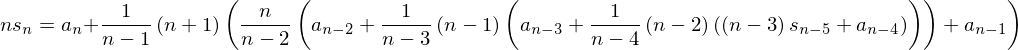

In [7]:
recurrence_eq = project_recurrence_spec(unfolded, recurrence_eq=True)
recurrence_eq

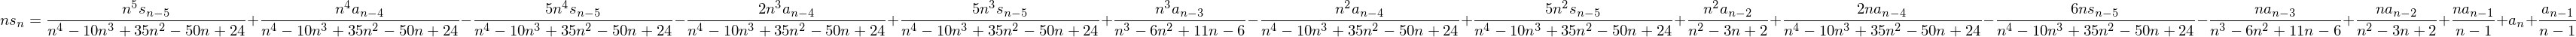

In [8]:
factored_recurrence_eq = project_recurrence_spec(factor_rhs_unfolded_rec(unfolded), recurrence_eq=True)
factored_recurrence_eq

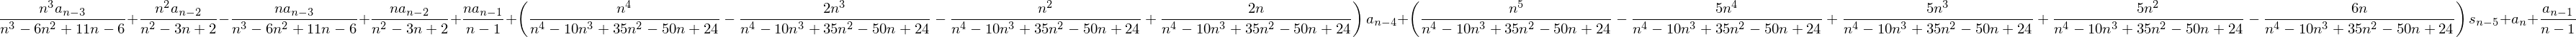

In [9]:
factored_recurrence_eq.rhs.collect(s[n-5]).collect(a[n-4])

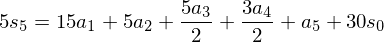

In [10]:
factored_recurrence_eq.subs(n,5)

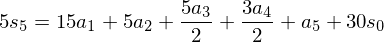

In [11]:
recurrence_eq.subs(n, 5)

In [12]:
def additional_term(n): return (2*Integer(n)-3)/6

as_dict = {a[n]:additional_term(n) for n in range(1,6)}

recurrence_eq.subs(n, 5).subs(as_dict)

---
## A curious relation about Fibonacci numbers, in matrix notation

In [2]:
d = 10
m = Matrix(d,d, lambda i,j: binomial(n-i,j)*binomial(n-j,i))
m

⎡           ⎛n⎞              ⎛n⎞              ⎛n⎞              ⎛n⎞            
⎢ 1         ⎜ ⎟              ⎜ ⎟              ⎜ ⎟              ⎜ ⎟            
⎢           ⎝1⎠              ⎝2⎠              ⎝3⎠              ⎝4⎠            
⎢                                                                             
⎢               2                                                             
⎢⎛n⎞     ⎛n - 1⎞       ⎛n - 2⎞ ⎛n - 1⎞  ⎛n - 3⎞ ⎛n - 1⎞  ⎛n - 4⎞ ⎛n - 1⎞  ⎛n -
⎢⎜ ⎟     ⎜     ⎟       ⎜     ⎟⋅⎜     ⎟  ⎜     ⎟⋅⎜     ⎟  ⎜     ⎟⋅⎜     ⎟  ⎜   
⎢⎝1⎠     ⎝  1  ⎠       ⎝  1  ⎠ ⎝  2  ⎠  ⎝  1  ⎠ ⎝  3  ⎠  ⎝  1  ⎠ ⎝  4  ⎠  ⎝  1
⎢                                                                             
⎢                                2                                            
⎢⎛n⎞  ⎛n - 2⎞ ⎛n - 1⎞     ⎛n - 2⎞       ⎛n - 3⎞ ⎛n - 2⎞  ⎛n - 4⎞ ⎛n - 2⎞  ⎛n -
⎢⎜ ⎟  ⎜     ⎟⋅⎜     ⎟     ⎜     ⎟       ⎜     ⎟⋅⎜     ⎟  ⎜     ⎟⋅⎜     ⎟  ⎜   
⎢⎝2⎠  ⎝  1  ⎠ ⎝  2  ⎠     ⎝  2  ⎠       ⎝  2  ⎠ ⎝  3

In [3]:
f = IndexedBase('f')
fibs = [fibonacci(i) for i in range(50)]
mp = (ones(1,d)*m*ones(d,1))[0,0]
odd_fibs_eq = Eq(f[2*n+1], mp, evaluate=True)
odd_fibs_eq

                                                                              
               ⎛n⎞     ⎛n⎞     ⎛n⎞     ⎛n⎞     ⎛n⎞     ⎛n⎞     ⎛n⎞     ⎛n⎞    
f[2*n + 1] = 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2⋅⎜ ⎟ + 2
               ⎝1⎠     ⎝2⎠     ⎝3⎠     ⎝4⎠     ⎝5⎠     ⎝6⎠     ⎝7⎠     ⎝8⎠    

                                                                              
 ⎛n⎞     ⎛n - 9⎞ ⎛n - 1⎞     ⎛n - 9⎞ ⎛n - 2⎞     ⎛n - 9⎞ ⎛n - 3⎞     ⎛n - 9⎞ ⎛
⋅⎜ ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟⋅⎜
 ⎝9⎠     ⎝  1  ⎠ ⎝  9  ⎠     ⎝  2  ⎠ ⎝  9  ⎠     ⎝  3  ⎠ ⎝  9  ⎠     ⎝  4  ⎠ ⎝

                                                                              
n - 4⎞     ⎛n - 9⎞ ⎛n - 5⎞     ⎛n - 9⎞ ⎛n - 6⎞     ⎛n - 9⎞ ⎛n - 7⎞     ⎛n - 9⎞
     ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟⋅⎜     ⎟ + 2⋅⎜     ⎟
  9  ⎠     ⎝  5  ⎠ ⎝  9  ⎠     ⎝  6  ⎠ ⎝  9  ⎠     ⎝  7  ⎠ ⎝  9  ⎠     ⎝  8  ⎠

                  2                              

In [4]:
(m*ones(d,1))

⎡                                                   ⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n⎞   ⎛n
⎢                                                   ⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜ ⎟ + ⎜ 
⎢                                                   ⎝1⎠   ⎝2⎠   ⎝3⎠   ⎝4⎠   ⎝5
⎢                                                                             
⎢                                                                             
⎢⎛n⎞   ⎛n - 9⎞ ⎛n - 1⎞   ⎛n - 8⎞ ⎛n - 1⎞   ⎛n - 7⎞ ⎛n - 1⎞   ⎛n - 6⎞ ⎛n - 1⎞  
⎢⎜ ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ +
⎢⎝1⎠   ⎝  1  ⎠ ⎝  9  ⎠   ⎝  1  ⎠ ⎝  8  ⎠   ⎝  1  ⎠ ⎝  7  ⎠   ⎝  1  ⎠ ⎝  6  ⎠  
⎢                                                                             
⎢                                                                             
⎢⎛n⎞   ⎛n - 9⎞ ⎛n - 2⎞   ⎛n - 8⎞ ⎛n - 2⎞   ⎛n - 7⎞ ⎛n - 2⎞   ⎛n - 6⎞ ⎛n - 2⎞  
⎢⎜ ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ + ⎜     ⎟⋅⎜     ⎟ +
⎢⎝2⎠   ⎝  2  ⎠ ⎝  9  ⎠   ⎝  2  ⎠ ⎝  8  ⎠   ⎝  2  ⎠ ⎝

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/massimo-nocentini/" property="cc:attributionName" rel="cc:attributionURL">Massimo Nocentini</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.